<a href="https://colab.research.google.com/github/cderamond/mba_UTFSM_finanzas/blob/main/muestraVar_mba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación previa

In [4]:
#correr una vez para preparar el trabjo
#Importing all required libraries
#Created by Sanket Karve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter
!pip install PyPortfolioOpt
#Installing the Portfolio Optimzation Library
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from matplotlib.ticker import FuncFormatter

# Carga de data y prep
Hasta aquí no hemos hecho nada más que cargar librerías. Dado que no encontré una forma de cargar acciones del IPSA mediante el datareader usaremos un csv que imagino es más fácil de reproducir. En excel simplemente guardan una tabla de datos como CSV.[texto del enlace](https://)

In [5]:
data=pd.read_csv('data_ejemplo.csv', sep=';', thousands=r'.', decimal= r',', index_col=0)
data.head()

,LAN,CAP,VAPORES,SQM-B,CENCOSUD,CMPC,LA POLAR,CCU,IPSA
Fecha,,,,,,,,,
Nov-05,3780.1,6655.2,876.11,6000.0,1042.1,13151.0,1460.0,2670.0,2027.61
Dec-05,3780.0,6740.0,820.11,5649.3,1006.8,12700.0,1400.0,2600.0,1964.47
Jan-06,4000.0,7269.9,840.00,6230.0,1168.5,13300.0,1590.0,2650.0,2118.46
Feb-06,4237.5,7580.4,800.91,6315.0,1230.7,14077.0,1600.0,2788.9,2166.84
Mar-06,4105.0,7300.3,640.00,6050.0,1335.2,15200.0,1635.0,2625.0,2181.96


no se dejen engañar por la apariencia debemos validar que sean números


In [6]:
data.dtypes

LAN         float64
CAP         float64
VAPORES     float64
SQM-B       float64
CENCOSUD    float64
CMPC        float64
LA POLAR    float64
CCU         float64
IPSA        float64
dtype: object

**sólo `Fecha` debería no ser un número**

ahora calculemos el % porcentual, y mostremos los principales estadísticos.

... estamos OK!

In [7]:
rentas = data.pct_change()
#guardemos como un vector la renta esperada (mean)
er= rentas.loc[:, 'LAN':'CCU'].mean()
rentas.describe()

,LAN,CAP,VAPORES,SQM-B,CENCOSUD,CMPC,LA POLAR,CCU,IPSA
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.026329,0.031246,0.001243,0.029949,0.026283,0.014774,0.019864,0.013884,0.016238
std,0.072301,0.131949,0.112509,0.107526,0.091462,0.077373,0.099350,0.058136,0.048283
min,-0.118312,-0.418119,-0.253659,-0.278233,-0.246414,-0.243337,-0.284784,-0.138019,-0.095783
25%,-0.025009,-0.026584,-0.065496,-0.026077,-0.029587,-0.034891,-0.027574,-0.023931,-0.017063
50%,0.011050,0.023714,-0.000344,0.014391,0.029340,0.010206,0.021875,0.010771,0.017390
75%,0.072223,0.074028,0.072165,0.077490,0.077440,0.060779,0.086284,0.049574,0.049040
max,0.218251,0.502639,0.354421,0.484847,0.277584,0.198352,0.228535,0.155213,0.160867


## Representación gráfica


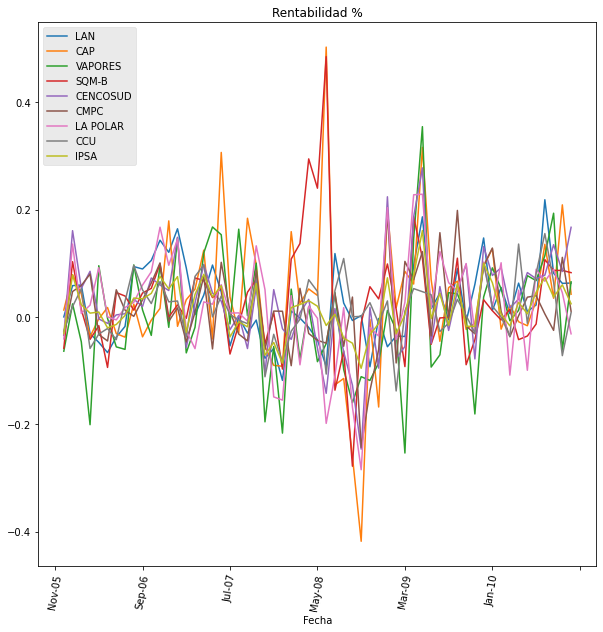

In [8]:
from IPython.core.pylabtools import figsize
rentas.plot(figsize=(10,10))
plt.title('Rentabilidad %')
plt.style.use("ggplot")
plt.xticks(rotation=80)
plt.legend(rentas.columns, loc='upper left')
#plt.show()


# Paso a paso replicando ejercicio
en ningún orden particular voy a replicar la parte estadística y luego haremos las EF, pesos y VaR


 ## Matriz covarianza

In [9]:
r_cov= rentas.loc[:, 'LAN':'CCU'].cov()
r_cov

,LAN,CAP,VAPORES,SQM-B,CENCOSUD,CMPC,LA POLAR,CCU
LAN,0.005228,0.001087,0.004553,0.000416,0.003198,0.001652,0.003275,0.002322
CAP,0.001087,0.017411,0.005463,0.008523,0.004426,0.003790,0.004948,0.000241
VAPORES,0.004553,0.005463,0.012658,0.003487,0.006311,0.001944,0.005645,0.002783
SQM-B,0.000416,0.008523,0.003487,0.011562,0.001770,0.000375,0.001541,0.000383
CENCOSUD,0.003198,0.004426,0.006311,0.001770,0.008365,0.004463,0.006391,0.002031
CMPC,0.001652,0.003790,0.001944,0.000375,0.004463,0.005987,0.003928,0.001003
LA POLAR,0.003275,0.004948,0.005645,0.001541,0.006391,0.003928,0.009870,0.002195
CCU,0.002322,0.000241,0.002783,0.000383,0.002031,0.001003,0.002195,0.003380


## Matriz correlación

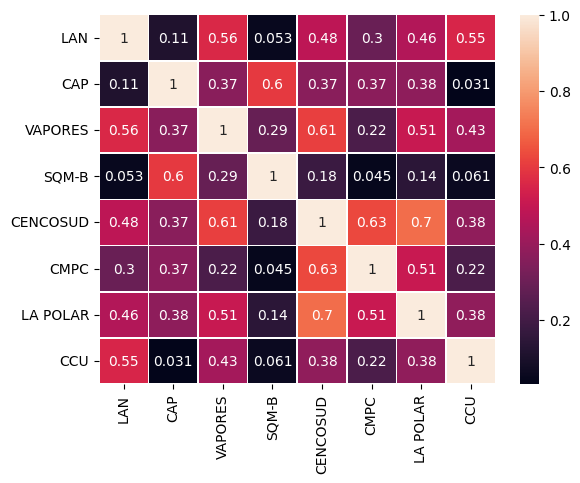

In [10]:
import seaborn as sns
r_cor= rentas.loc[:, 'LAN':'CCU'].corr()
plt.style.use('default')
sns.heatmap(r_cor, annot = True, linewidths = 0.5)
plt.show()

## Distribuciones, visión gráfica

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd3f654590>,
      dtype=object)

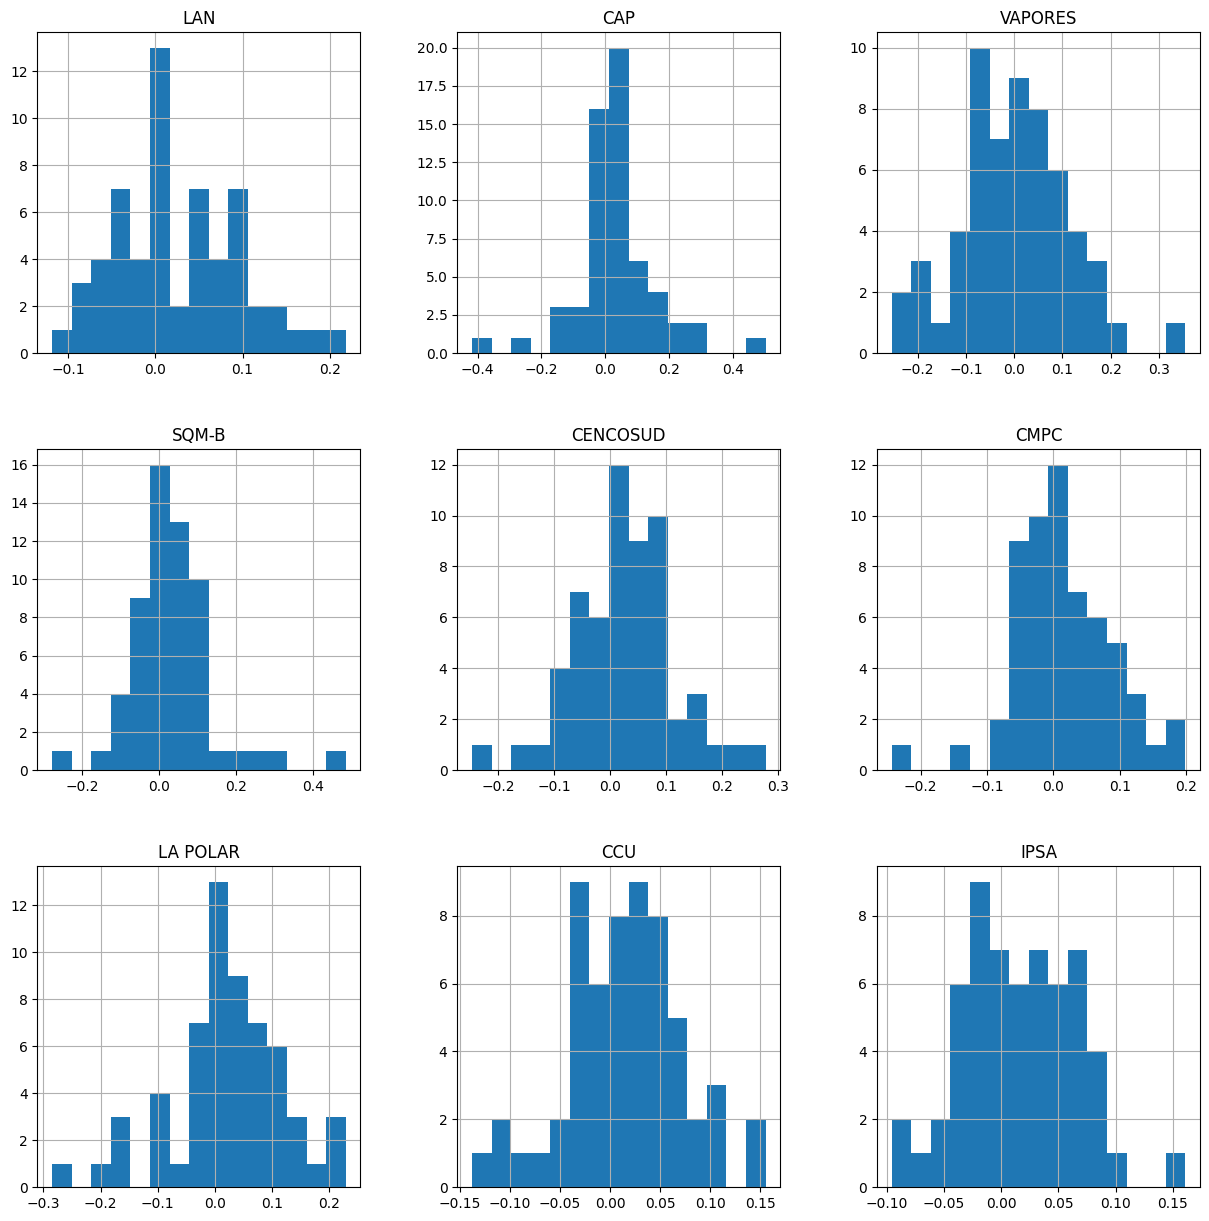

In [22]:
rentas.hist(figsize=(15,15), bins=15)
